# AutoEncoders for Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2,
    cluster_std=1.0,random_state=101)

In [4]:
X,y = data

In [5]:
X.shape

(300, 2)

In [6]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [7]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [8]:
feat

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118
...,...,...,...
295,1.320546,2.605592,1.523750
296,-8.043916,-6.010589,1.290230
297,-9.733566,-7.460380,-1.478319
298,-10.722075,-5.568565,0.214234


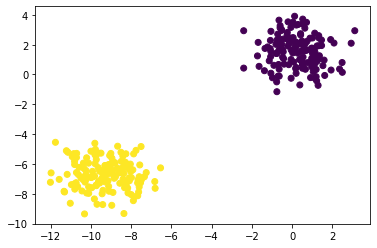

In [9]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [10]:
from mpl_toolkits.mplot3d import Axes3D

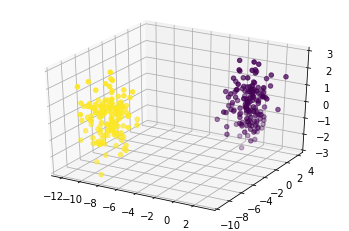

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

## Encoder and Decoder

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
# 3 input -> 2 neurons --- > 3 output


encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))




In [14]:
decoder = Sequential()

decoder.add(Dense(units=3, activation='relu',input_shape=[2]))


In [15]:
autoencoder = Sequential([encoder,decoder])

In [16]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [17]:
#scale our data
from sklearn.preprocessing import MinMaxScaler


In [18]:
scaler = MinMaxScaler()

In [19]:
scaled_data = scaler.fit_transform(feat) #we don't have right answer so we fit transform over the entire dataset

In [20]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2086
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1346
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1644
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1271
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1399


In [21]:
encoded_2dm = encoder.predict(scaled_data)

In [23]:
encoded_2dm.shape

(300, 2)

In [24]:
scaled_data.shape

(300, 3)

In [25]:
#so we reduce the dimensions

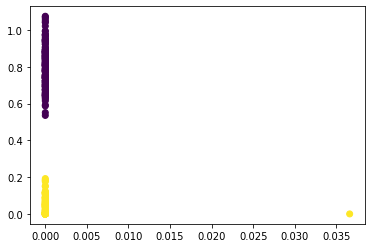

In [27]:
plt.scatter(encoded_2dm[:,0],encoded_2dm[:,1],c=y)